<a href="https://colab.research.google.com/github/EdoHanifauzan/data/blob/Notebook/notebooks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
import numpy as np
plt.ion()

#Tugas 1 Dissimilarty

-Cari dataset dari URL

-Tentukan dissimilarity antara binary dan variable

In [2]:
import pandas as pd 
url_dataset = "https://raw.githubusercontent.com/EdoHanifauzan/data/main/train.CSV"
df = pd.read_csv(url_dataset)

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,C
1,2,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
2,3,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
3,4,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,S
4,5,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# embark code
code_embark_for_cherbourg = "C"
code_embark_for_southampton = "S"

# binary value
value_of_one = 1
value_of_zero = 0

def change_code_embark_to_biner(embarked):
    return value_of_one if embarked == code_embark_for_southampton else value_of_zero

# Update all values of 'Embarked' series
df["Embarked"] = df["Embarked"].apply(change_code_embark_to_biner)

In [5]:
df[["PassengerId","Name","Survived", "Embarked"]].head(8)

,PassengerId,Name,Survived,Embarked
0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0
1,2,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,1
2,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",0,1
3,4,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1
4,5,"Braund, Mr. Owen Harris",0,0
5,6,"Heikkinen, Miss. Laina",1,1
6,7,"Allen, Mr. William Henry",0,1
7,8,"Moran, Mr. James",0,0


In [6]:
# CONSTAN VARIABLE
DECREMENT_BY_ONE = 1
INCREMENT_BY_ONE = 1

CONTINGENCY_TABLE_VALUE = {
    "q" : (1,1),
    "r" : (1,0),
    "s" : (0,1),
    "t" : (0,0),
}
def get_series(df, idx, series):
    return df.loc[(idx - DECREMENT_BY_ONE), series]

def get_dissimilarity_dataset(df, series_index = [], series = []):
    first_series = get_series(df, series_index[0], series)
    second_series = get_series(df, series_index[1], series)
    dataset = pd.concat([first_series,second_series],axis=1)
    return dataset.T

In [7]:
get_dissimilarity_dataset(df, [1,2], ["Survived", "Embarked"]).T

,0,1
Survived,1,1
Embarked,0,1


In [8]:
df.loc[0:7, ["Survived", "Embarked"]]

,Survived,Embarked
0,1,0
1,1,1
2,0,1
3,1,1
4,0,0
5,1,1
6,0,1
7,0,0


In [9]:
def count_contingency_value(df, start_index = 0, last_index = 1):

    CONTINGENCY_VALUE = {
        "q" : 0,
        "r" : 0,
        "s" : 0,
        "t" : 0,
    }

    column_range = df.shape[1]

    for column in range(column_range):
        for value in CONTINGENCY_TABLE_VALUE:
            item = list((tuple(df.loc[(start_index - DECREMENT_BY_ONE):(last_index - DECREMENT_BY_ONE), df.columns[column]]) == CONTINGENCY_TABLE_VALUE[value], value))
            if item[0] == True:
                if item[1] == "q":
                    CONTINGENCY_VALUE["q"] += 1
                if item[1] == "r":
                    CONTINGENCY_VALUE["r"] += 1
                if item[1] == "s":
                    CONTINGENCY_VALUE["s"] += 1
                if item[1] == "t":
                    CONTINGENCY_VALUE["t"] += 1

    return CONTINGENCY_VALUE

In [10]:
# d(1,2)
dd_1_2 = get_dissimilarity_dataset(df, [1,2], ["Survived", "Embarked"])
dd_1_2

,Survived,Embarked
0,1,0
1,1,1


In [11]:
c_d_1_2 = count_contingency_value(dd_1_2, 1, 2)
c_d_1_2

{'q': 1, 'r': 0, 's': 1, 't': 0}

In [12]:
# d(1,3)
dd_1_3 = get_dissimilarity_dataset(df, [1,3], ["Survived", "Embarked"])
dd_1_3

,Survived,Embarked
0,1,0
2,0,1


In [13]:
c_d_1_3 = count_contingency_value(dd_1_3, 1, 3)
c_d_1_3

{'q': 0, 'r': 1, 's': 1, 't': 0}

In [14]:
# d(1,4)
dd_1_4 = get_dissimilarity_dataset(df, [1,4], ["Survived", "Embarked"])
dd_1_4

,Survived,Embarked
0,1,0
3,1,1


In [15]:
c_d_1_4 = count_contingency_value(dd_1_4, 1, 4)
c_d_1_4

{'q': 1, 'r': 0, 's': 1, 't': 0}

In [16]:
# d(1,5)
dd_1_5 = get_dissimilarity_dataset(df, [1,5], ["Survived", "Embarked"])
dd_1_5

,Survived,Embarked
0,1,0
4,0,0


In [17]:
c_d_1_5 = count_contingency_value(dd_1_5, 1, 5)
c_d_1_5

{'q': 0, 'r': 1, 's': 0, 't': 1}

In [18]:
def measure_dissimilarity_binary_value_assymetric_distance(contingency_value):

    return (contingency_value["r"] + contingency_value["s"]) / (contingency_value["q"] + contingency_value["r"] + contingency_value["s"])

In [19]:
d_1_2 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_2)
d_1_3 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_3)
d_1_4 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_4)

In [20]:
d_1_2

0.5

In [21]:
d_1_3

1.0

In [22]:
d_1_4

0.5

#Tugas 2 Diskritisasi

1. Lakukan proses diskritisasi dengan equal width dan equal frequency

2. Lakukan proses diskritisasi dengan basis entropy

In [23]:
import numpy as np
import pandas as pd
import math
pd.options.mode.chained_assignment = None

In [24]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
data = pd.read_csv(url)

In [25]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


- Definisi discretization :

Proses mengubah data bertipe data numeric menjadi data bertipe categorical

Diskritisasi memiliki 2 pendekatan yaitu equal-width intervals dan equal-frequency intervals

equal-width intervals adalah diskritisasi dengan lebar data yang sama

equal-frequency intervals adalah diskritisasi dengan jumlah data yang sama

- Equal Wdth Interval :

Equal-width intervals adalah distraksi yang membagi data numerik menjadi beberapa kelompok dengan lebar kelompok yang kurang lebih sama besar.

Rumus untuk membagi kedalam k interval \begin{align} w = \frac {(max -min)}{b} \end{align}

Rumus untuk mencari batasan \begin{align} min+w, min+2w, … , min+(k-1)w \end{align}

In [26]:
sepal_length = data[["sepal.length"]]
sepal_width = data[["sepal.width"]]
petal_length = data[["petal.length"]]
petal_width = data[["petal.width"]]

In [27]:
def cut(col, k):
    intervals = pd.cut(data[col], k).value_counts().index.to_list()
    return [[interval.left, interval.right] for interval in intervals]

In [28]:
def toCategory(list_interval, col):
    # get length interval
    length = len(list_interval)

    # Sorting interval
    sort_interval = np.sort(list_interval, axis=0)
    # Get Category from interval
    categories = np.array([chr(65+i) for i in range(length)])[:, None]
    # combine into interval data
    intervals = np.hstack((sort_interval, categories))

    # Operate All data
    newCol = []
    for i, row in data.iterrows():
        datas = row[col]
        for interval in intervals:
            if datas >= interval[0].astype(float) and datas <= interval[1].astype(float):
                newCol.append(interval[2])
                break
    # return new coloumn category
    return np.array(newCol, dtype=str)

In [29]:
interval_sepal_length = cut("sepal.length", 4)
interval_sepal_width = cut("sepal.width", 4)
interval_petal_length = cut("petal.length", 4)
interval_petal_width = cut("petal.width", 4)

print("interval sepal.length :", interval_sepal_length)
print("interval sepal.width  :", interval_sepal_width)
print("interval petal.length :", interval_petal_length)
print("interval petal.width  :", interval_petal_width)

interval sepal.length : [[5.2, 6.1], [4.296, 5.2], [6.1, 7.0], [7.0, 7.9]]
interval sepal.width  : [[2.6, 3.2], [3.2, 3.8], [1.998, 2.6], [3.8, 4.4]]
interval petal.length : [[3.95, 5.425], [0.994, 2.475], [5.425, 6.9], [2.475, 3.95]]
interval petal.width  : [[0.0976, 0.7], [1.3, 1.9], [1.9, 2.5], [0.7, 1.3]]


In [30]:
sepal_length["category"] = toCategory(interval_sepal_length, "sepal.length")
sepal_width["category"] = toCategory(interval_sepal_width, "sepal.width")
petal_length["category"] = toCategory(interval_petal_length, "petal.length")
petal_width["category"] = toCategory(interval_petal_width, "petal.width")

display(sepal_length)
display(sepal_width)
display(petal_length)
display(petal_width)

,sepal.length,category
0,5.1,A
1,4.9,A
2,4.7,A
3,4.6,A
4,5.0,A
...,...,...
145,6.7,C
146,6.3,C
147,6.5,C
148,6.2,C


,sepal.width,category
0,3.5,C
1,3.0,B
2,3.2,B
3,3.1,B
4,3.6,C
...,...,...
145,3.0,B
146,2.5,A
147,3.0,B
148,3.4,C


,petal.length,category
0,1.4,A
1,1.4,A
2,1.3,A
3,1.5,A
4,1.4,A
...,...,...
145,5.2,C
146,5.0,C
147,5.2,C
148,5.4,C


,petal.width,category
0,0.2,A
1,0.2,A
2,0.2,A
3,0.2,A
4,0.2,A
...,...,...
145,2.3,D
146,1.9,C
147,2.0,D
148,2.3,D


Equal-Frequency Interval :

Equal-frequency intervals adalah distraksi yang membagi data numerik menjadi beberapa kelompok dengan jumlah anggota yang kurang lebih sama besar.

In [31]:
sepal_length = data[["sepal.length"]]
sepal_width = data[["sepal.width"]]
petal_length = data[["petal.length"]]
petal_width = data[["petal.width"]]

Mencari interval menggunakan metode Equal-Frequency Interval dengan qcut Pandas

In [32]:
def qcut(col, k):
    intervals = pd.qcut(data[col], k).value_counts().index.to_list()
    return [[interval.left, interval.right] for interval in intervals]

In [33]:
interval_sepal_length = qcut("sepal.length", 4)
interval_sepal_width = qcut("sepal.width", 4)
interval_petal_length = qcut("petal.length", 4)
interval_petal_width = qcut("petal.width", 4)

print("interval sepal.length :", interval_sepal_length)
print("interval sepal.width  :", interval_sepal_width)
print("interval petal.length :", interval_petal_length)
print("interval petal.width  :", interval_petal_width)

interval sepal.length : [[4.2989999999999995, 5.1], [5.1, 5.8], [5.8, 6.4], [6.4, 7.9]]
interval sepal.width  : [[1.999, 2.8], [3.3, 4.4], [2.8, 3.0], [3.0, 3.3]]
interval petal.length : [[0.999, 1.6], [4.35, 5.1], [5.1, 6.9], [1.6, 4.35]]
interval petal.width  : [[0.099, 0.3], [1.3, 1.8], [0.3, 1.3], [1.8, 2.5]]


In [34]:
sepal_length["category"] = toCategory(interval_sepal_length, "sepal.length")
sepal_width["category"] = toCategory(interval_sepal_width, "sepal.width")
petal_length["category"] = toCategory(interval_petal_length, "petal.length")
petal_width["category"] = toCategory(interval_petal_width, "petal.width")

display(sepal_length)
display(sepal_width)
display(petal_length)
display(petal_width)

,sepal.length,category
0,5.1,A
1,4.9,A
2,4.7,A
3,4.6,A
4,5.0,A
...,...,...
145,6.7,D
146,6.3,C
147,6.5,D
148,6.2,C


,sepal.width,category
0,3.5,D
1,3.0,B
2,3.2,C
3,3.1,C
4,3.6,D
...,...,...
145,3.0,B
146,2.5,A
147,3.0,B
148,3.4,D


,petal.length,category
0,1.4,A
1,1.4,A
2,1.3,A
3,1.5,A
4,1.4,A
...,...,...
145,5.2,D
146,5.0,C
147,5.2,D
148,5.4,D


,petal.width,category
0,0.2,A
1,0.2,A
2,0.2,A
3,0.2,A
4,0.2,A
...,...,...
145,2.3,D
146,1.9,D
147,2.0,D
148,2.3,D



- Entropy : 

Entropy merupakan informasi yang menggambarkan seberapa konsisten pemisah akan cocok dengan pengklasifikasi

Rumus mencari entrhopy \begin{align} Entrophy = - \sum P_i log_2 p_i \end{align}

Rumus mencari informasi \begin{align} info(D_{new}) = \frac {|D_1|}{|D|} Entrophy(D_2) + \frac {|D_2|}{|D|} Entrophy(D_2) \end{align}

Rumus mencari gain \begin{align} gain = D_{new} - D_{initial} \end{align}

In [35]:
sample = data[["sepal.length"]]
sample.describe()

,sepal.length
count,150.000000
mean,5.843333
std,0.828066
min,4.300000
25%,5.100000
50%,5.800000
75%,6.400000
max,7.900000


In [36]:
np.random.seed(0)
sample["category"] = np.where(np.random.choice(2, sample.shape[0]) < 1, "A", "B" )
sample

,sepal.length,category
0,5.1,A
1,4.9,B
2,4.7,B
3,4.6,A
4,5.0,B
...,...,...
145,6.7,A
146,6.3,B
147,6.5,B
148,6.2,B


Membuat fungsi getOverallCategory digunakan untuk menghitung data keseluruhan yang nantinya akan digunakan untuk menghitung entropy

In [37]:
def getOverallCategory(col):
    group = sample.loc[:, :].groupby("category").count()
    a = group.loc["A", col]
    b = group.loc["B", col]
    return (a, b, a+b)

Fungsi splitter digunakan untuk membuat split antara value yang telah di tentukan lalu mengembalikan data yang telah dipisahkan

In [38]:
def splitter(value:float, col:str)->tuple:
    # get data less and greater from value
    less = sample[sample[col] <= value]
    greater = sample[sample[col] > value]

    # calculate into category for each data
    less_group = less.loc[:, :].groupby("category").count()
    greater_group = greater.loc[:, :].groupby("category").count()

    # get value based on category
    less_category_A = less_group.loc["A", col]

    less_category_B = less_group.loc["B", col]
    greater_category_A = greater_group.loc["A", col]
    greater_category_B = greater_group.loc["B", col]

    return (
        [less_category_A, less_category_B, less_category_A + less_category_B],
        [greater_category_A, greater_category_B, greater_category_A + greater_category_B]
    )

In [39]:
def entropy(d):
    r1 = (d[0] / d[2]) * np.log2(d[0] / d[2])
    r2 = (d[1] / d[2]) * np.log2(d[1] / d[2])
    return np.sum([r1, r2]) * -1

In [40]:
def info(d):
    r1 = (d[0][2] / sample.shape[0])  * entropy(d[0])
    r2 = (d[1][2] / sample.shape[0]) * entropy(d[1])
    return r1 + r2

In [41]:
def gain(Einitial, Enew):
    return Einitial - Enew

In [42]:
D = getOverallCategory("sepal.length")
entropy_d = entropy(D)
print(D)
display(entropy_d)

(68, 82, 150)


0.993707106604508

In [43]:
split1 = splitter(4.5, "sepal.length")
info_split1 = info(split1)
gain(entropy_d, info_split1)

0.0069930419733333915

In [44]:
split2 = splitter(6.5, "sepal.length")
info_split1 = info(split1)
gain(entropy_d, info_split1)

0.0069930419733333915

In [45]:
split3 = splitter(7.2, "sepal.length")
info_split1 = info(split1)
gain(entropy_d, info_split1)

0.0069930419733333915

#Tugas 3 KNN-Alghorithm

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

K-NN adalah sebuah algoritma untuk melakukan klasifikasi terhdap objek latih yang jaraknya paling dekat dengan objek tersebut

- Algoritma K-NN :

1. Menentukan parameter k (jumlah tetangga paling dekat)

2. Menghitung kuadrat jarak eucliden objek terhdap data training yang diberikan

3. Mengurutkan hasil no 2 secara ascending

4. Mengumpulkan kategori y (klasifikasi nearest neighbor berdasarkan nilai k)

5. dengan menggunakan kategori nearest neighbor yang paling mayoritas maka dapat di prediksi kategori objek.

In [47]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
data = pd.read_csv(url)

In [48]:
data.head(-1)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
144,6.7,3.3,5.7,2.5,Virginica
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica


In [49]:
X = data.iloc[:,:-1].values
y = data.iloc[:, 4].values

Membagi data latih dan uji

Pada tahap ini data yang jumlahnya 150 ajan dibagi menjadi data latih dan data uji dengan menggunakan **train_test_split ** agar data yang dibagi seimbang

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, stratify=y, random_state=0)

In [51]:
print(X_train)

[[5.  2.  3.5 1. ]
 [4.9 3.  1.4 0.2]
 [4.4 2.9 1.4 0.2]
 [5.  2.3 3.3 1. ]
 [4.9 2.5 4.5 1.7]
 [6.3 2.5 5.  1.9]
 [6.3 2.3 4.4 1.3]
 [5.  3.5 1.3 0.3]
 [6.1 2.8 4.7 1.2]
 [5.  3.5 1.6 0.6]
 [5.8 4.  1.2 0.2]
 [5.6 2.5 3.9 1.1]
 [5.2 3.4 1.4 0.2]
 [5.8 2.8 5.1 2.4]
 [5.  3.4 1.6 0.4]
 [5.6 2.9 3.6 1.3]
 [6.  2.7 5.1 1.6]
 [6.6 3.  4.4 1.4]
 [6.4 2.9 4.3 1.3]
 [6.4 2.8 5.6 2.2]
 [7.7 3.8 6.7 2.2]
 [5.7 2.6 3.5 1. ]
 [5.2 4.1 1.5 0.1]
 [6.1 3.  4.9 1.8]
 [7.7 2.8 6.7 2. ]
 [6.2 2.8 4.8 1.8]
 [7.7 3.  6.1 2.3]
 [5.8 2.6 4.  1.2]
 [6.2 2.9 4.3 1.3]
 [6.9 3.2 5.7 2.3]
 [5.8 2.7 5.1 1.9]
 [7.3 2.9 6.3 1.8]
 [6.8 2.8 4.8 1.4]
 [4.4 3.  1.3 0.2]
 [5.  3.6 1.4 0.2]
 [6.  2.2 5.  1.5]
 [6.4 2.8 5.6 2.1]
 [4.9 2.4 3.3 1. ]
 [6.6 2.9 4.6 1.3]
 [6.7 3.1 5.6 2.4]
 [7.7 2.6 6.9 2.3]
 [5.1 3.8 1.9 0.4]
 [4.8 3.4 1.6 0.2]
 [5.4 3.  4.5 1.5]
 [5.4 3.4 1.7 0.2]
 [6.9 3.1 4.9 1.5]
 [7.9 3.8 6.4 2. ]
 [5.4 3.7 1.5 0.2]
 [5.7 3.8 1.7 0.3]
 [6.8 3.  5.5 2.1]
 [5.5 2.3 4.  1.3]
 [7.6 3.  6.6 2.1]
 [5.2 2.7 3.

In [52]:
lb = LabelEncoder()
lb.fit(y_train)

y_train = lb.transform(y_train)
y_test = lb.transform(y_test)

Standarisasi

Algoritma KNN menggunakan metrik jarak (Euclidean), sehingga memiliki data yang terdistribusi merata khususnya pada distribusi normal akan meningkatkan performa model KNN ini. Maka dari itu diperlukan proses standarisasi data.

In [53]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

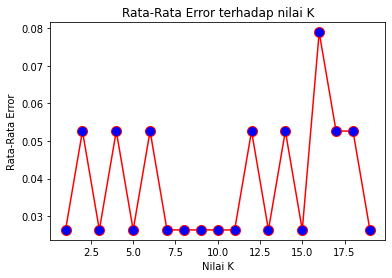

In [54]:
error = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure()
plt.plot(range(1, 20), error, color='red', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Rata-Rata Error terhadap nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Rata-Rata Error')
plt.show()

Bisa dilihat dari grafik diatas yang memiliki tingkat eror yang kecil yaitu 2,3,4,5 maka nilai k yang diambil nantinya 4

Training

Menggunakan nilai Konstanta K=4

In [55]:
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [56]:
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred, target_names=lb.classes_))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.87      1.00      0.93        13
   Virginica       1.00      0.83      0.91        12

    accuracy                           0.95        38
   macro avg       0.96      0.94      0.95        38
weighted avg       0.95      0.95      0.95        38



In [57]:
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred, target_names=lb.classes_))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.87      1.00      0.93        13
   Virginica       1.00      0.83      0.91        12

    accuracy                           0.95        38
   macro avg       0.96      0.94      0.95        38
weighted avg       0.95      0.95      0.95        38



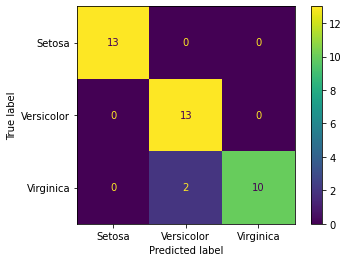

In [58]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=lb.classes_).plot()

#Tugas 4 Naive Bayes

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Naïve Bayes Clasifier atau disebut juga dengan Bayesian Classification merupakan metode pengklasifikasian statistik yang didasarkan pada teorema bayes yang dapat digunakan untuk memprediksi probabilitas keanggotaan suatu kelas. Bayesian Classification terbukti memiliki akurasi dan kecepatan yang tinggi saat diaplikasikan ke dalam database yang besar.

In [60]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
data = pd.read_csv(url)

In [61]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Memisahkan antara fitur dengan label/kategori dengan variable X mengambil 4 kolom dan variable Y mengambil kolom label/kategori

In [62]:
X = data.iloc[:,: 4].values
Y = data.iloc[:, -1].values

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

In [64]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Membagi Data Train dan Test

Pada tahap ini data yang jumlahnya 150 ajan dibagi menjadi 2 yaitu data Train dan data Test dengan menggunakan **train_test_split ** agar data yang dibagi seimbang dengan size 0.3 yaitu 30% dari dari 150 dan dimulai dari 0

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=0)

Standarisasi

Algoritma Naive bayes pada pengujian kali ini menggunakan metrik jarak (Euclidean), sehingga memiliki data yang terdistribusi merata khususnya pada distribusi normal akan meningkatkan performa model Naive Bayes ini. Maka dari itu diperlukan proses standarisasi data.

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [67]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

In [68]:
y_pred = classifier.predict(X_test)

In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

In [70]:
cm

array([[16,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 11]])

In [71]:
from sklearn.metrics import classification_report
y_pred = classifier.predict(X_test)
print(classification_report(Y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        16
  Versicolor       1.00      1.00      1.00        18
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



#Tugas 5 K-means

In [72]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

## Algoritma K-means

diterapkan pada objek yang diwakili dalam bentuk titik didalam ruangan vektor berdimensi d. K-means mengcluster semua data dialam setiap dimensi titik dalam segmentasi yang sama diberi custer ID. nilai dari K adalah masukan dasar dar algoritma yang menentukan jumlah segmentasi yang ingin dibentuk. Partisi aan dibentuk dari sekumpulan objek n kedalam cluster k sehingga terbentuk kesamaan objek dalam setiap segmentasi k.

### Langkah-Langkah Algoritma K-means
Tentukan nilai k sebagai jumlah klaster yang ingin dibentuk.

1. Bangkitkan k centroid (titik pusat klaster) awal secara random.

2. Hitung Jarak setiap data ke masing-masing centroid mengunkan rumus korelasi antar dua objek yaitu Euclidean Distance dan kesamaan Cosine.

3. Kelompokan setiap data berdasarkan jarak terdekat antara data dengan centroidnya.

4. Tentukan posisi centroid baru (k C) dengan cara menghitung nilai rata-rata dari data-data yang ada pada centroid yang sama.

\begin{align}C_{k} = (\frac {1}n_{k} )\sum d_i \ \end{align}

Dimana k n adalah jumlah dokumen dalam cluster k dan i d adalah dokumen dalam cluster k.

In [73]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
data = pd.read_csv(url)

In [74]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [75]:
#Label Encoding - for encoding categorical features into numerical ones
encoder = LabelEncoder()
data['variety'] = encoder.fit_transform(data['variety'])

In [76]:
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


- Train-Test Split

melakukan pembagian data menjadi dua data yaitu data uji dan data latih

In [77]:
#converting dataframe to np array 
Data = data.values 

X=Data [:, 0:5]
Y= Data [: , -1]

print(X.shape)
print(Y.shape)

#train-test split = 3:1 

train_x = X[: 112, ]
train_y = Y[:112, ]

test_x = X[112:150, ]
test_y = Y[112:150, ]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(150, 5)
(150,)
(112, 5)
(112,)
(38, 5)
(38,)


In [78]:
#KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(train_x, train_y)

# training predictions
train_labels= kmeans.predict(train_x)

#testing predictions
test_labels = kmeans.predict(test_x)

In [79]:
#KMeans model accuracy

#training accuracy
print(accuracy_score(train_y, train_labels)*100)
#testing accuracy
print(accuracy_score(test_labels, test_y)*100)

99.10714285714286
94.73684210526315


In [80]:
#classification report for training set 
print(classification_report(train_y, train_labels))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       0.98      1.00      0.99        50
         2.0       1.00      0.92      0.96        12

    accuracy                           0.99       112
   macro avg       0.99      0.97      0.98       112
weighted avg       0.99      0.99      0.99       112



#UTS

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [82]:
url_dataset = "https://raw.githubusercontent.com/EdoHanifauzan/data/main/dataR2.csv"
duts = pd.read_csv(url_dataset)

In [83]:
duts.head

<bound method NDFrame.head of      Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0     48  23.500000       70    2.707  0.467409   8.8071     9.702400   
1     83  20.690495       92    3.115  0.706897   8.8438     5.429285   
2     82  23.124670       91    4.498  1.009651  17.9393    22.432040   
3     68  21.367521       77    3.226  0.612725   9.8827     7.169560   
4     86  21.111111       92    3.549  0.805386   6.6994     4.819240   
..   ...        ...      ...      ...       ...      ...          ...   
111   45  26.850000       92    3.330  0.755688  54.6800    12.100000   
112   62  26.840000      100    4.530  1.117400  12.4500    21.420000   
113   65  32.050000       97    5.730  1.370998  61.4800    22.540000   
114   72  25.590000       82    2.820  0.570392  24.9600    33.750000   
115   86  27.180000      138   19.910  6.777364  90.2800    14.110000   

     Resistin    MCP.1  Classification  
0     7.99585  417.114               1  
1     4.064

In [84]:
X = duts.iloc[:,:-1].values
y = duts.iloc[:, 9].values

Pada tahap ini data yang jumlahnya 1516ajan dibagi menjadi data latih dan data uji dengan menggunakan **train_test_split ** agar data yang dibagi seimbang

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, stratify=y, random_state=0)

In [86]:
print(X_train)

[[6.90000000e+01 3.25000000e+01 9.30000000e+01 5.43000000e+00
  1.24564200e+00 1.51450000e+01 1.17879600e+01 1.17879600e+01
  2.70142000e+02]
 [7.10000000e+01 2.79155188e+01 1.04000000e+02 1.82000000e+01
  4.66890667e+00 5.34997000e+01 1.65602000e+00 4.92418400e+01
  2.56001000e+02]
 [5.90000000e+01 2.86726261e+01 7.70000000e+01 3.18800000e+00
  6.05507467e-01 1.70220000e+01 1.64404800e+01 3.16904000e+01
  9.10489000e+02]
 [5.10000000e+01 1.83700000e+01 1.05000000e+02 6.03000000e+00
  1.56177000e+00 9.62000000e+00 1.27600000e+01 3.21000000e+00
  5.13660000e+02]
 [5.30000000e+01 3.67901662e+01 1.01000000e+02 1.01750000e+01
  2.53493167e+00 2.71841000e+01 2.00300000e+01 1.02630900e+01
  6.95754000e+02]
 [5.90000000e+01 2.28328793e+01 9.80000000e+01 6.86200000e+00
  1.65877413e+00 1.49037000e+01 4.23010500e+00 8.20490000e+00
  3.55310000e+02]
 [4.30000000e+01 3.44221736e+01 8.90000000e+01 2.31940000e+01
  5.09185613e+00 3.12128000e+01 8.30095500e+00 6.71026000e+00
  9.60246000e+02]
 [6.50

In [87]:
lb = LabelEncoder()
lb.fit(y_train)

y_train = lb.transform(y_train)
y_test = lb.transform(y_test)

In [88]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

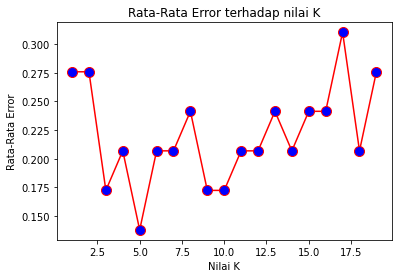

In [89]:
error = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure()
plt.plot(range(1, 20), error, color='red', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Rata-Rata Error terhadap nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Rata-Rata Error')
plt.show()

In [90]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [91]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1])

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.88      0.88      0.88        16

    accuracy                           0.86        29
   macro avg       0.86      0.86      0.86        29
weighted avg       0.86      0.86      0.86        29



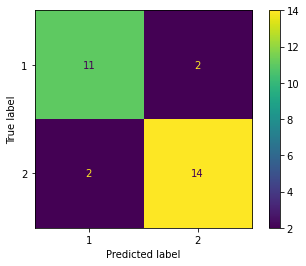

In [93]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=lb.classes_).plot()

In [94]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) 

acc_knn = round(neigh.score(X_train, y_train) * 100, 2)
print(acc_knn)

81.61


##Decision tree

In [95]:
import pandas
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [96]:
# x sebagai variable independent
x = duts.drop(['Classification'], axis = 1)
x.head

<bound method NDFrame.head of      Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0     48  23.500000       70    2.707  0.467409   8.8071     9.702400   
1     83  20.690495       92    3.115  0.706897   8.8438     5.429285   
2     82  23.124670       91    4.498  1.009651  17.9393    22.432040   
3     68  21.367521       77    3.226  0.612725   9.8827     7.169560   
4     86  21.111111       92    3.549  0.805386   6.6994     4.819240   
..   ...        ...      ...      ...       ...      ...          ...   
111   45  26.850000       92    3.330  0.755688  54.6800    12.100000   
112   62  26.840000      100    4.530  1.117400  12.4500    21.420000   
113   65  32.050000       97    5.730  1.370998  61.4800    22.540000   
114   72  25.590000       82    2.820  0.570392  24.9600    33.750000   
115   86  27.180000      138   19.910  6.777364  90.2800    14.110000   

     Resistin    MCP.1  
0     7.99585  417.114  
1     4.06405  468.786  
2     9.27715  554

In [97]:
# y sebagai variable dependent
y = duts['Classification']
y.head

<bound method NDFrame.head of 0      1
1      1
2      1
3      1
4      1
      ..
111    2
112    2
113    2
114    2
115    2
Name: Classification, Length: 116, dtype: int64>

In [98]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=0)

In [99]:
print(x_train)

     Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
43    69  32.500000       93    5.430  1.245642  15.1450    11.787960   
98    71  27.915519      104   18.200  4.668907  53.4997     1.656020   
80    59  28.672626       77    3.188  0.605507  17.0220    16.440480   
72    51  18.370000      105    6.030  1.561770   9.6200    12.760000   
31    53  36.790166      101   10.175  2.534932  27.1841    20.030000   
..   ...        ...      ...      ...       ...      ...          ...   
76    55  31.975015       92   16.635  3.775036  37.2234    11.018455   
10    34  21.470000       78    3.469  0.667436  14.5700    13.110000   
28    35  35.250761       90    6.817  1.513374  50.6094     6.966895   
112   62  26.840000      100    4.530  1.117400  12.4500    21.420000   
49    85  26.600000       96    4.462  1.056602   7.8500     7.931700   

     Resistin    MCP.1  
43   11.78796  270.142  
98   49.24184  256.001  
80   31.69040  910.489  
72    3.21000  513.660 

In [100]:
clf = DecisionTreeClassifier(criterion="gini")
clf = clf.fit(x_train,y_train)

In [101]:
y_pred = clf.predict(x_test)

Akurasi

In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.80      0.62      0.70        13
           2       0.74      0.88      0.80        16

    accuracy                           0.76        29
   macro avg       0.77      0.75      0.75        29
weighted avg       0.77      0.76      0.75        29



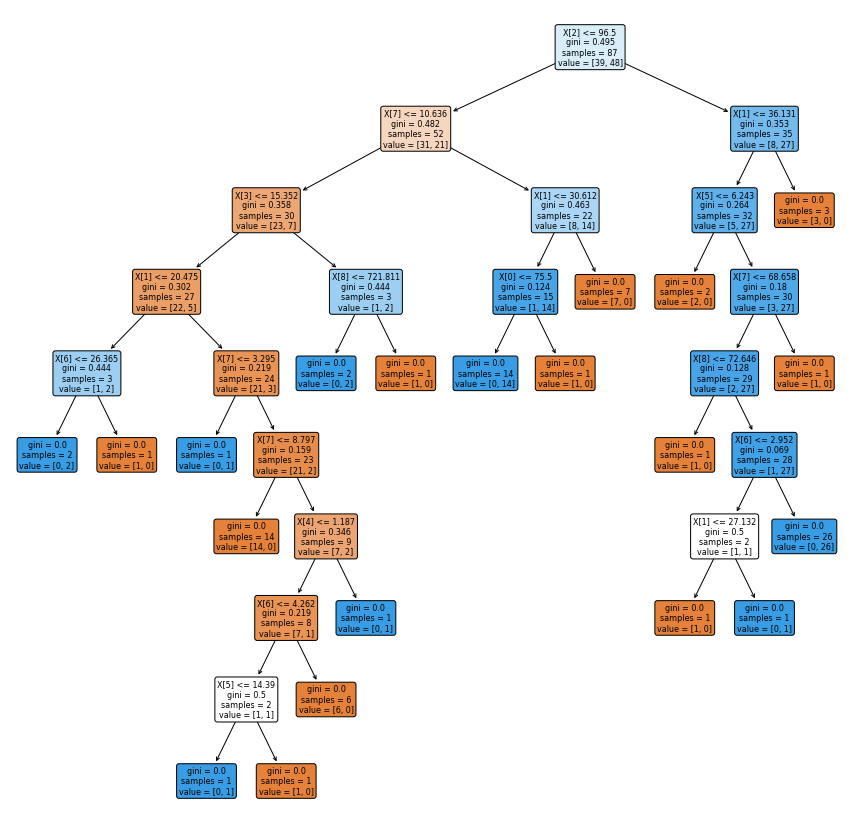

In [103]:
plt.figure(figsize=(15,15))
#create the tree plot
a = tree.plot_tree(clf,
                   rounded = True,
                   filled = True,
                   fontsize=8)
#show the plot
plt.show()